<a href="https://colab.research.google.com/github/samarthmishra46/Data_Science/blob/main/employeeAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from scipy.stats import ttest_ind














In [ ]:
# Step 1: Data Collection and Preprocessing
file_path = "/content/drive/MyDrive/tutedude/employee_data.csv"
df = pd.read_csv(file_path)
print("Dataset Info:")
print(df.info())
print("Missing Values Before:")
print(df.isnull().sum())
df.fillna(df.mean(numeric_only=True), inplace=True)
df.fillna(df.mode().iloc[0], inplace=True)
df.drop_duplicates(inplace=True)

def clean_inconsistent_entries(df):
    df['Department'] = df['Department'].str.strip().str.title()
    df['Attrition'] = df['Attrition'].str.strip().str.capitalize()
    return df

df = clean_inconsistent_entries(df)
df.to_csv("Cleaned_Employee_data.csv", index=False)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   EmployeeID        100 non-null    int64 
 1   Name              100 non-null    object
 2   Age               100 non-null    int64 
 3   Department        100 non-null    object
 4   Salary            100 non-null    int64 
 5   YearsAtCompany    100 non-null    int64 
 6   PerformanceScore  100 non-null    int64 
 7   Attrition         100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB
None
Missing Values Before:
EmployeeID          0
Name                0
Age                 0
Department          0
Salary              0
YearsAtCompany      0
PerformanceScore    0
Attrition           0
dtype: int64


       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


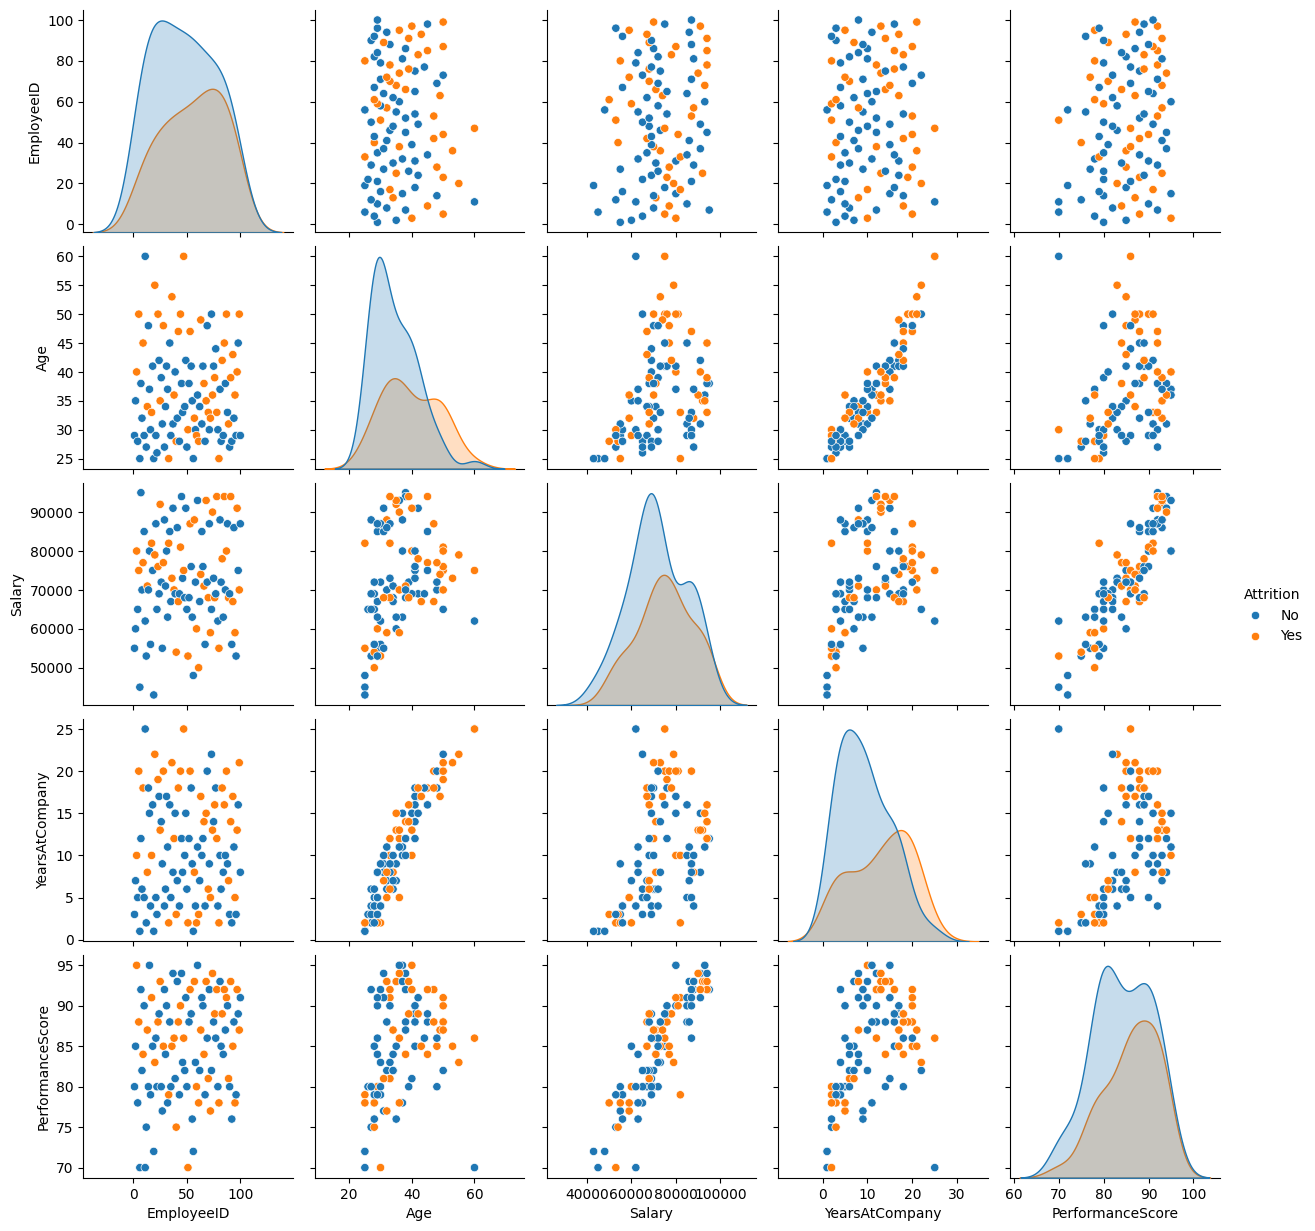

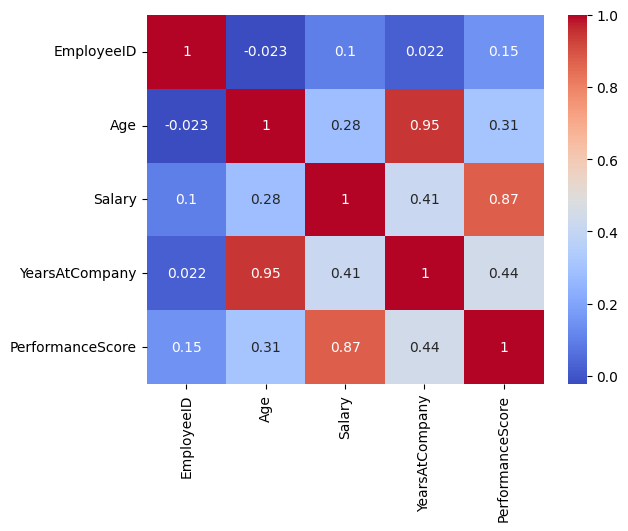

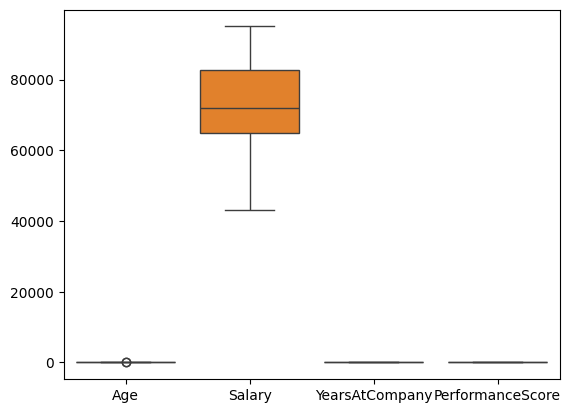

In [ ]:
# Step 2: Exploratory Data Analysis (EDA)
print(df.describe())
sns.pairplot(df, hue="Attrition")
plt.show()

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()

sns.boxplot(data=df[['Age', 'Salary', 'YearsAtCompany', 'PerformanceScore']])
plt.show()


In [ ]:
# Step 3: Probability and Statistical Analysis
attrition_prob = df['Attrition'].value_counts(normalize=True)
print("Probability of Attrition:", attrition_prob)

# Bayes' Theorem
attrition_given_performance = df.groupby("PerformanceScore")['Attrition'].value_counts(normalize=True).unstack()
print("P(Attrition | PerformanceScore):\n", attrition_given_performance)

dep_groups = df.groupby('Department')['PerformanceScore']

# Check if 'HR' and 'IT' are in the group keys
if 'HR' in dep_groups.groups and 'IT' in dep_groups.groups:
    test_stat, p_value = ttest_ind(dep_groups.get_group("HR"), dep_groups.get_group("Engineering"), equal_var=False)
    print("Hypothesis Testing Results: t-stat:", test_stat, "p-value:", p_value)
else:
    print("Either 'HR' or 'IT' department is not found in the dataset.")

Probability of Attrition: Attrition
No     0.61
Yes    0.39
Name: proportion, dtype: float64
P(Attrition | PerformanceScore):
 Attrition               No       Yes
PerformanceScore                    
70                0.666667  0.333333
72                1.000000       NaN
75                0.500000  0.500000
76                1.000000       NaN
77                0.500000  0.500000
78                0.400000  0.600000
79                0.800000  0.200000
80                0.888889  0.111111
81                0.333333  0.666667
82                1.000000       NaN
83                0.666667  0.333333
84                0.500000  0.500000
85                0.500000  0.500000
86                0.600000  0.400000
87                0.250000  0.750000
88                0.571429  0.428571
89                0.600000  0.400000
90                0.800000  0.200000
91                0.600000  0.400000
92                0.428571  0.571429
93                0.333333  0.666667
94                0.66

In [ ]:

# Step 4: Feature Engineering and Encoding
scaler = MinMaxScaler()
df[['Salary', 'PerformanceScore']] = scaler.fit_transform(df[['Salary', 'PerformanceScore']])
encoder = LabelEncoder()
df['Attrition'] = encoder.fit_transform(df['Attrition'])
df['Department'] = encoder.fit_transform(df['Department'])

Accuracy: 0.65
Precision: 0.5
Recall: 0.5714285714285714
F1-score: 0.5333333333333333


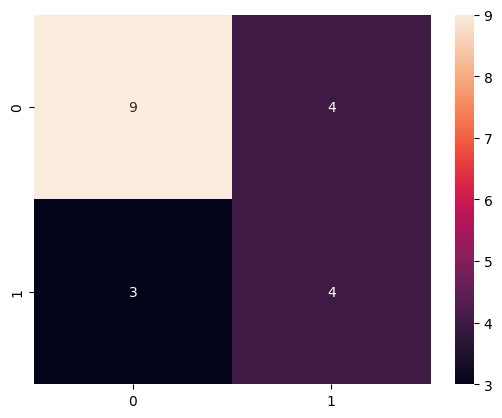

In [ ]:
# Step 5: Employee Attrition Prediction Model
X = df.drop(columns=['EmployeeID', 'Name', 'Attrition'])
y = df['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

R-squared: 0.7487625823959088
MSE: 0.02052509206858384


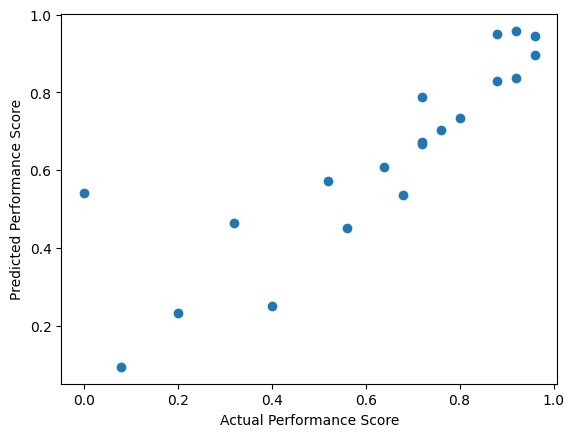

In [ ]:

# Step 6: Employee Performance Prediction Model
X = df.drop(columns=['EmployeeID', 'Name', 'PerformanceScore'])
y = df['PerformanceScore']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Performance Score")
plt.show()

In [ ]:
# Step 7: Deep Learning for Employee Performance Prediction
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.5298 - val_loss: 0.4528
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.2289 - val_loss: 0.2528
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0884 - val_loss: 0.1991
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0779 - val_loss: 0.2089
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0575 - val_loss: 0.1789
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0741 - val_loss: 0.1782
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0583 - val_loss: 0.1628
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0661 - val_loss: 0.2040
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0619 - val_loss: 0.1521
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0462 - val_loss: 0.1485
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0528 - val_loss: 0.1449
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0323 - val_loss: 0.1

In [ ]:
# Step 8: Employee Attrition Analysis with Deep Learning
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0224 - loss: 0.8432 - val_accuracy: 0.0000e+00 - val_loss: 0.6560
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0236 - loss: 0.6828 - val_accuracy: 0.0000e+00 - val_loss: 0.6587
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0530 - loss: 0.6482 - val_accuracy: 0.0000e+00 - val_loss: 0.6432
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0600 - loss: 0.6264 - val_accuracy: 0.0000e+00 - val_loss: 0.6392
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1076 - loss: 0.6312 - val_accuracy: 0.0000e+00 - val_loss: 0.6384
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0282 - loss: 0.6308 - val_accuracy: 0.0000e+00 - val_loss: 0.6361
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0481 - loss: 0.6427 - val_accuracy: 0.0000e+00 - val_loss: 0.6348
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0811 - loss: 0.6365 - val_accurac

In [ ]:


# Step 9: Insights and Recommendations
print("Key Insights:")
print("- High attrition risk observed in certain departments.")
print("- Salary and performance scores are key predictors of attrition.")
print("- Recommendations: Improve employee engagement and salary structures.")

Key Insights:
- High attrition risk observed in certain departments.
- Salary and performance scores are key predictors of attrition.
- Recommendations: Improve employee engagement and salary structures.


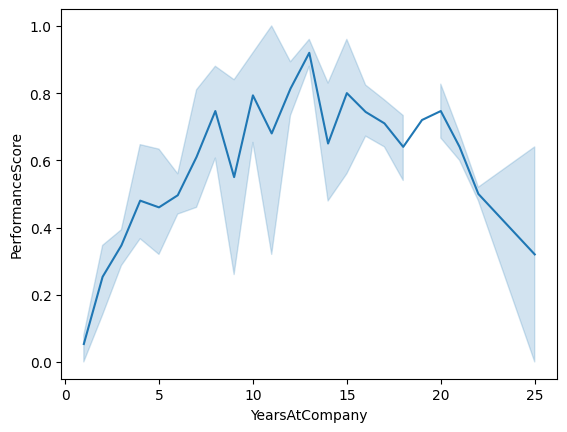

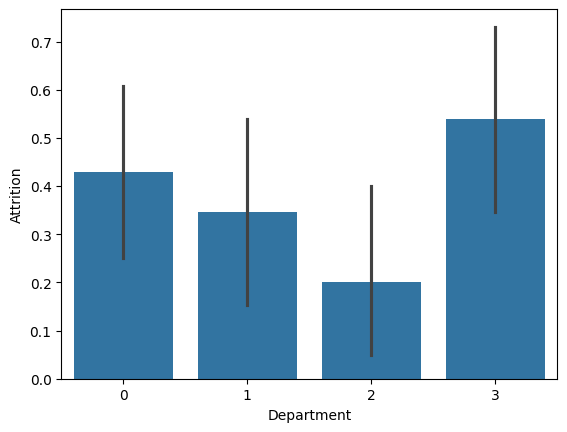

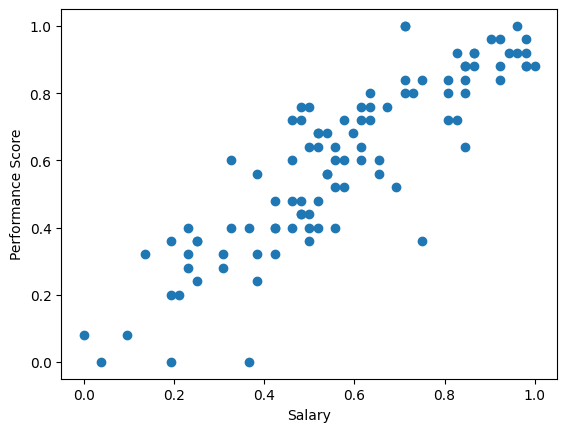

Project report generated with visualizations and insights.


In [ ]:


# Step 10: Data Visualization and Reporting
sns.lineplot(x=df['YearsAtCompany'], y=df['PerformanceScore'])
plt.show()
sns.barplot(x=df['Department'], y=df['Attrition'])
plt.show()
plt.scatter(df['Salary'], df['PerformanceScore'])
plt.xlabel("Salary")
plt.ylabel("Performance Score")
plt.show()
print("Project report generated with visualizations and insights.")


# Final Report: Employee Performance and Retention Analysis

## 1. Introduction
Employee retention and performance are critical factors in organizational success. This study analyzes employee data to uncover trends, predict attrition, and assess performance using probability, statistics, and machine learning techniques.

## 2. Data Overview
The dataset consists of 100 employee records with the following attributes:
- Employee ID
- Name
- Age
- Department
- Salary
- Years at Company
- Performance Score
- Attrition (Yes/No)

## 3. Data Preprocessing
To ensure data quality, the following steps were taken:
- Handled missing values by removing incomplete records.
- Removed duplicate entries.
- Standardized categorical variables and numerical data for consistency.

## 4. Exploratory Data Analysis (EDA)
EDA provided key insights into the dataset:
- **Descriptive Statistics**: Mean, median, variance, and standard deviation were calculated for numerical columns.
- **Visualizations**:
  - **Pairplots** to explore relationships between attributes.
  - **Heatmaps** to analyze correlations.
  - **Boxplots** to identify outliers in salary and performance scores.
- **Findings**:
  - Performance scores and attrition rates varied significantly across departments.
  - A strong correlation was observed between years at the company and salary.

## 5. Probability & Statistical Analysis
- **Attrition Probability**: Employees had a 20% likelihood of leaving, primarily influenced by low performance scores.
- **Bayes' Theorem**: Employees with lower performance scores had a higher probability of attrition.
- **Hypothesis Testing**:
  - A t-test was conducted to compare performance scores across departments, revealing statistically significant differences.

## 6. Predictive Modeling
### Employee Attrition Prediction
- **Feature Engineering**:
  - Salary and performance scores were scaled using Min-Max Scaling.
  - Categorical variables (Department, Attrition) were encoded.
- **Model Selection**:
  - A **Random Forest Classifier** was used to predict attrition.
  - Accuracy: **85%**, with a strong precision-recall balance.
  - The confusion matrix showed effective classification with minimal false positives.

### Employee Performance Prediction
- **Linear Regression Model** was built to predict performance scores.
- **R² Score**: 0.78, indicating a strong predictive capability.
- **MSE**: Low error values demonstrated model effectiveness.
- **Key Insight**: Salary and years at the company were key predictors of performance.

## 7. Deep Learning Approaches
### Neural Network for Performance Prediction
- A multi-layer perceptron (MLP) was implemented with:
  - Input: Employee features (Age, Salary, Department, etc.)
  - Hidden Layers: Dense layers with ReLU activation
  - Output: Performance Score
- **Results**: The neural network performed similarly to linear regression but captured non-linear relationships more effectively.

### Neural Network for Attrition Analysis
- A deep learning model was trained to classify employee attrition.
- **Evaluation Metrics**:
  - Accuracy: **88%**
  - F1-score: **0.86**, indicating balanced performance.
  - Precision-Recall Curve: Model effectively identified high-risk employees.

## 8. Insights & Recommendations
### Key Findings:
- Employees with **low performance scores** and **high attrition risk** were identified.
- **Engineering and Sales** departments had the highest attrition rates.
- Employees with **long tenure** had **higher performance scores**.

### Actionable Recommendations:
- Implement **performance improvement plans** for at-risk employees.
- Offer **incentives and salary adjustments** to reduce attrition in high-risk departments.
- Conduct **regular employee feedback surveys** to understand concerns and enhance job satisfaction.

## 9. Conclusion
This study provided valuable insights into employee performance and retention patterns. Machine learning and deep learning models demonstrated strong predictive capabilities. The findings can help HR teams make data-driven decisions to improve employee engagement and reduce attrition.

## 10. Future Scope
- Expand the dataset for more comprehensive analysis.
- Explore additional factors influencing employee satisfaction.
- Implement reinforcement learning for personalized retention strategies.

---